<a href="https://colab.research.google.com/github/Samiratu/NCDS-predict/blob/main/heart_diabetes_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# libraries for building the neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diabetes = pd.read_csv('/content/drive/My Drive/disease-data//diabetes_data.csv')
# Sample of the dataset
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# size of dataset
diabetes.shape

(520, 17)

In [ ]:
# identify variable types
diabetes.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [ ]:
#Understand various summary statistics of the data
diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
#Get count of values in a categorical variable
diabetes['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [ ]:
diabetes['class'].unique()

array(['Positive', 'Negative'], dtype=object)

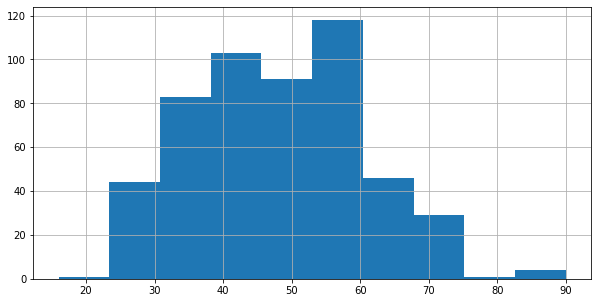

In [ ]:
diabetes.Age.hist(figsize=(10,5))

In [ ]:
 diabetes.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
# Transformation categorical to numerical
diabetes = diabetes.replace({'Gender': {'Male': 1,  'Female': 0}})
diabetes = diabetes.replace({'Polyuria': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Polydipsia': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'sudden weight loss': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'weakness': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Polyphagia': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Genital thrush': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'visual blurring': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Itching': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Irritability': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'delayed healing': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'partial paresis': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'muscle stiffness': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Alopecia': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Obesity': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'class': {'Positive': 1,  'Negative': 0}})


In [ ]:
# Scaling continues age because its a continues variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diabetes[['Age']] = scaler.fit_transform(diabetes[['Age']])

In [ ]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
Ydiab = diabetes['class']
Xdiab = diabetes.drop(['class'], axis = 1)

### Function for Ploting training History

In [ ]:
def plot_training_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

Feature Importances :  [0.02468059 0.1104956  0.22259757 0.24462892 0.05272717 0.03362136
 0.0257689  0.02738756 0.03067236 0.02826071 0.05165935 0.02664803
 0.03390522 0.0117486  0.05558585 0.01961219]


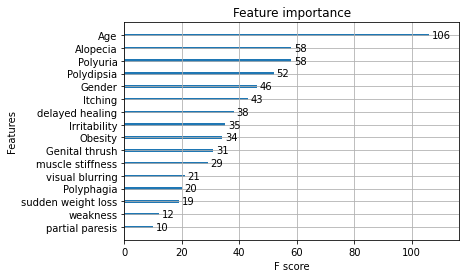

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(Xdiab, Ydiab)
print("Feature Importances : ", xgb_model.feature_importances_)
# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
# Creating a new dataframe with the 8 most correlated features
diab_df = diabetes[['Age', 'Alopecia','Polyuria','Polydipsia', 'Gender','Itching', 'delayed healing', 'Irritability', 'class']]
diab_df.head()

,Age,Alopecia,Polyuria,Polydipsia,Gender,Itching,delayed healing,Irritability,class
0,0.324324,1,0,1,1,1,1,0,1
1,0.567568,1,0,0,1,0,0,0,1
2,0.337838,1,1,0,1,1,1,0,1
3,0.391892,0,0,0,1,1,1,0,1
4,0.594595,1,1,1,1,1,1,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
# Funtion for normalizing data
def normalizeData(X, Y):
    Y = normalizer.fit_transform(Y)
    X = normalizer.fit_transform(X)

In [ ]:
# split data into X and Y train
Yd = diab_df[['class']]
Xd = diab_df.drop(['class'],axis=1)
# normalizeData(Xd, Yd)

In [ ]:
Xd.head()

,Age,Alopecia,Polyuria,Polydipsia,Gender,Itching,delayed healing,Irritability
0,0.324324,1,0,1,1,1,1,0
1,0.567568,1,0,0,1,0,0,0
2,0.337838,1,1,0,1,1,1,0
3,0.391892,0,0,0,1,1,1,0
4,0.594595,1,1,1,1,1,1,1


In [ ]:
# Split data into train and test
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, Yd, test_size=0.2, random_state=43)

## Initial Model

In [ ]:
dmodel = Sequential()
dmodel.add(Dense(5,activation='relu',input_dim=8))
dmodel.add(Dense(1,activation='sigmoid'))
print(dmodel.summary())
dmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history1 = dmodel.fit(x=Xd_train, y = yd_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
14/14 - 1s - loss: 0.6317 - accuracy: 0.6024 - val_loss: 0.6087 - val_accuracy: 0.6071
Epoch 2/300
14/14 - 0s - loss: 0.6142 - accuracy: 0.5843 - val_loss: 0.5986 - val_accuracy: 0.5714
Epoch 3/300
14/14 - 0s - loss: 0.5998 - accuracy: 0.5813 - val_loss: 0.5896 - val_accuracy: 0.5714
Epoch 4/300
14/14 - 0s - loss: 0.5866 - accuracy: 0.5813 - val_loss: 0.5806 - val_accuracy: 0.5714
Epoch 5/300
14/14 - 0s - loss: 0.5753 - accuracy: 0.5843 - val_loss: 0.5725 - val_accuracy: 0.5714
Epoch 6/300
14/14 - 0s - loss: 0.5631 - accuracy: 0.5934 - val_loss: 0.5642 - val_accuracy: 0.6071
Epoch 7/300
14/14 - 0s - loss: 0.5517 - accuracy: 0.6235 - val_loss: 0.5554 - val_accuracy: 0.6429
Epoch 8/300
14/14 - 0s - loss: 0.5407 - accuracy: 0.6717 - val_loss: 0.5460 - val_accuracy: 0.6667
Epoch 9/300
14/14 - 0s - loss: 0.5299 - accuracy: 0.7078 - val_loss: 0.5362 - val_accuracy: 0.7500
Epoch 10/300
14/14 - 0s - loss: 0.5184 - accuracy: 0.7289 - val_loss: 0.5256 - val_accuracy: 0.7500
Epoch 11/

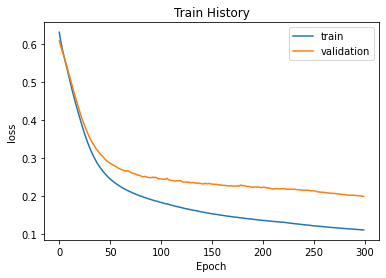

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history1,'loss','val_loss')

In [ ]:
ydi_pred = dmodel.predict(Xd_test)


rounded = [round(x[0]) for x in ydi_pred]
ydi_pred = rounded

from sklearn.metrics import accuracy_score
score_d = round(accuracy_score(ydi_pred,yd_test)*100,2)

print("The accuracy score of the initial model on the Test set is: "+str(score_d)+" %")

The accuracy score of the initial model on the Test set is: 94.23 %


## First Optimized Model

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.optimizers import SGD
diab_model = Sequential()
diab_model.add(Dense(units=15, input_dim=8, kernel_initializer='uniform', activation='relu'))
diab_model.add(Dropout(0.3))
diab_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
diab_model.add(Dropout(0.2))
diab_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(diab_model.summary())
opt = SGD(lr=0.03, momentum=0.9)
diab_model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['acc',f1_m,precision_m, recall_m])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 15)                135       
_________________________________________________________________
dropout_14 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 48        
_________________________________________________________________
dropout_15 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 4         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history = diab_model.fit(x=Xd_train, y = yd_train, validation_split=0.2, epochs=200, batch_size=5, verbose=2)

Epoch 1/200
67/67 - 1s - loss: 0.6781 - acc: 0.5994 - f1_m: 0.7132 - precision_m: 0.5955 - recall_m: 0.9701 - val_loss: 0.6637 - val_acc: 0.6310 - val_f1_m: 0.7316 - val_precision_m: 0.6294 - val_recall_m: 0.9412
Epoch 2/200
67/67 - 0s - loss: 0.6753 - acc: 0.6084 - f1_m: 0.7360 - precision_m: 0.6075 - recall_m: 1.0000 - val_loss: 0.6620 - val_acc: 0.6310 - val_f1_m: 0.7316 - val_precision_m: 0.6294 - val_recall_m: 0.9412
Epoch 3/200
67/67 - 0s - loss: 0.6734 - acc: 0.6084 - f1_m: 0.7284 - precision_m: 0.6075 - recall_m: 0.9851 - val_loss: 0.6594 - val_acc: 0.6310 - val_f1_m: 0.7316 - val_precision_m: 0.6294 - val_recall_m: 0.9412
Epoch 4/200
67/67 - 0s - loss: 0.6704 - acc: 0.6084 - f1_m: 0.7298 - precision_m: 0.6119 - recall_m: 1.0000 - val_loss: 0.6828 - val_acc: 0.6310 - val_f1_m: 0.7316 - val_precision_m: 0.6294 - val_recall_m: 0.9412
Epoch 5/200
67/67 - 0s - loss: 0.6574 - acc: 0.6084 - f1_m: 0.7380 - precision_m: 0.6119 - recall_m: 1.0000 - val_loss: 0.5723 - val_acc: 0.6310 - v

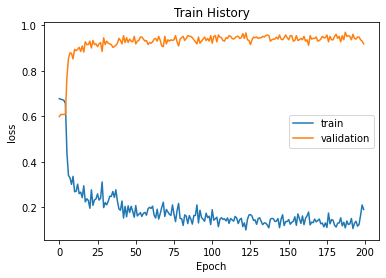

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history,'loss','acc')

In [ ]:
yd_pred = diab_model.predict(Xd_test)


rounded = [round(x[0]) for x in yd_pred]
yd_pred = rounded

from sklearn.metrics import accuracy_score
score_dd = round(accuracy_score(yd_pred,yd_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_dd)+" %")

The accuracy score of the optimized model on the Test set is: 94.23 %


In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = diab_model.evaluate(Xd_test, yd_test, verbose=0)
print(loss)
print(accuracy)
print(f1_score)
print(precision)
print(recall)

0.15973308682441711
0.942307710647583
0.9349390268325806
0.9653679728507996
0.9147727489471436


In [ ]:
from sklearn.metrics import roc_curve
yd_pred_keras = diab_model.predict(Xd_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yd_test, yd_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9861932938856015

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[36  3]
 [ 3 62]]


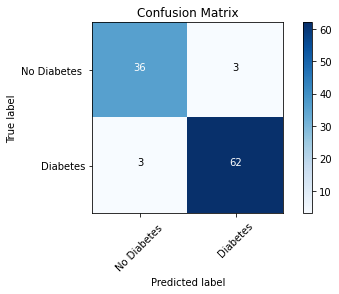

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=yd_test, y_pred=yd_pred)
cm_plot_labels = ['No Diabetes ','Diabetes']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Heart Disease Prediction

In [ ]:
heart = pd.read_csv('/content/drive/My Drive/disease-data//heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
def null_proportion(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df
    

### Preprocessing Heart Disease Data

In [ ]:
null_proportion(heart)

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
cp,cp,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0


In [ ]:
Yher = heart['target']
Xher = heart.drop(['target'], axis = 1)

Feature Importances :  [0.02468059 0.1104956  0.22259757 0.24462892 0.05272717 0.03362136
 0.0257689  0.02738756 0.03067236 0.02826071 0.05165935 0.02664803
 0.03390522 0.0117486  0.05558585 0.01961219]


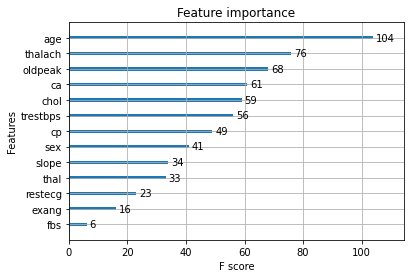

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
# fit model to training data
xgb = XGBClassifier(random_state = 0 )
xgb.fit(Xher, Yher)
print("Feature Importances : ", xgb_model.feature_importances_)
# plot feature importance
plot_importance(xgb)
plt.show()

###  Creating a new heart disease dataframe with the first 8 features that are highly correlated to the target

In [ ]:
heart_df = heart[['age' ,'thalach' ,'oldpeak', 'ca' ,'chol','trestbps','cp','sex','target']]
heart_df.head()

,age,thalach,oldpeak,ca,chol,trestbps,cp,sex,target
0,63,150,2.3,0,233,145,3,1,1
1,37,187,3.5,0,250,130,2,1,1
2,41,172,1.4,0,204,130,1,0,1
3,56,178,0.8,0,236,120,1,1,1
4,57,163,0.6,0,354,120,0,0,1


### Data Normalization

In [ ]:
heart_df.head()

,age,thalach,oldpeak,ca,chol,trestbps,cp,sex,target
0,63,150,2.3,0,233,145,3,1,1
1,37,187,3.5,0,250,130,2,1,1
2,41,172,1.4,0,204,130,1,0,1
3,56,178,0.8,0,236,120,1,1,1
4,57,163,0.6,0,354,120,0,0,1


### Split and Normalize data

In [ ]:
# split data into X and Y train
Yh = heart_df[['target']]
Xh = heart_df.drop(['target'],axis=1)
normalizeData(Xh, Yh)

In [ ]:
Xh.head()

,age,thalach,oldpeak,ca,chol,trestbps,cp,sex
0,63,150,2.3,0,233,145,3,1
1,37,187,3.5,0,250,130,2,1
2,41,172,1.4,0,204,130,1,0
3,56,178,0.8,0,236,120,1,1
4,57,163,0.6,0,354,120,0,0


In [ ]:
# Split data into train and test
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, Yh, test_size=0.2, random_state=43)

Initial Model Without Optimization

In [ ]:
hmodel = Sequential()
hmodel.add(Dense(5,activation='relu',input_dim=8))
hmodel.add(Dense(1,activation='sigmoid'))
print(hmodel.summary())
hmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history1 = hmodel.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
8/8 - 1s - loss: 101.9817 - accuracy: 0.5544 - val_loss: 106.5999 - val_accuracy: 0.5102
Epoch 2/300
8/8 - 0s - loss: 97.7157 - accuracy: 0.5544 - val_loss: 101.8581 - val_accuracy: 0.5102
Epoch 3/300
8/8 - 0s - loss: 93.3958 - accuracy: 0.5544 - val_loss: 97.2077 - val_accuracy: 0.5102
Epoch 4/300
8/8 - 0s - loss: 89.1490 - accuracy: 0.5544 - val_loss: 92.5440 - val_accuracy: 0.5102
Epoch 5/300
8/8 - 0s - loss: 84.9200 - accuracy: 0.5544 - val_loss: 87.8304 - val_accuracy: 0.5102
Epoch 6/300
8/8 - 0s - loss: 80.4184 - accuracy: 0.5544 - val_loss: 83.1002 - val_accuracy: 0.5102
Epoch 7/300
8/8 - 0s - loss: 75.9897 - accuracy: 0.5544 - val_loss: 78.1348 - val_accuracy: 0.5102
Epoch 8/300
8/8 - 0s - loss: 71.5146 - accuracy: 0.5544 - val_loss: 72.8825 - val_accuracy: 0.5102
Epoch 9/300
8/8 - 0s - loss: 66.3452 - accuracy: 0.5544 - val_loss: 67.5292 - val_accuracy: 0.5102
Epoch 10/300
8/8 - 0s - loss: 60.9374 - accuracy: 0.5544 - val_loss: 61.6014 - val_accuracy: 0.5102
Epoch 

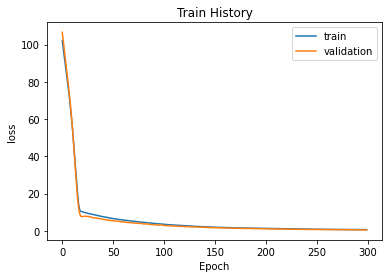

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history1,'loss','val_loss')

In [ ]:
yhi_pred = hmodel.predict(Xh_test)


rounded = [round(x[0]) for x in yhi_pred]
yhi_pred = rounded

from sklearn.metrics import accuracy_score
score_h = round(accuracy_score(yhi_pred,yh_test)*100,2)

print("The accuracy score of the initial model on the Test set is: "+str(score_h)+" %")

The accuracy score of the initial model on the Test set is: 81.97 %


# First Optimized Model

In [ ]:
heart_model = Sequential()
heart_model.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))
heart_model.add(Dropout(0.4))
heart_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
heart_model.add(Dropout(0.4))
heart_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(heart_model.summary())
heart_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 33        
_________________________________________________________________
dropout_17 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history = heart_model.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
8/8 - 1s - loss: 0.6933 - acc: 0.5130 - f1_m: 0.5992 - precision_m: 0.5498 - recall_m: 0.6884 - val_loss: 0.6926 - val_acc: 0.5102 - val_f1_m: 0.6733 - val_precision_m: 0.5092 - val_recall_m: 1.0000
Epoch 2/300
8/8 - 0s - loss: 0.6906 - acc: 0.5389 - f1_m: 0.6656 - precision_m: 0.5526 - recall_m: 0.8424 - val_loss: 0.6920 - val_acc: 0.5102 - val_f1_m: 0.6733 - val_precision_m: 0.5092 - val_recall_m: 1.0000
Epoch 3/300
8/8 - 0s - loss: 0.6923 - acc: 0.5285 - f1_m: 0.6733 - precision_m: 0.5444 - recall_m: 0.9103 - val_loss: 0.6914 - val_acc: 0.5102 - val_f1_m: 0.6733 - val_precision_m: 0.5092 - val_recall_m: 1.0000
Epoch 4/300
8/8 - 0s - loss: 0.6907 - acc: 0.5648 - f1_m: 0.7145 - precision_m: 0.5603 - recall_m: 0.9904 - val_loss: 0.6911 - val_acc: 0.5102 - val_f1_m: 0.6733 - val_precision_m: 0.5092 - val_recall_m: 1.0000
Epoch 5/300
8/8 - 0s - loss: 0.6888 - acc: 0.5544 - f1_m: 0.7069 - precision_m: 0.5525 - recall_m: 1.0000 - val_loss: 0.6906 - val_acc: 0.5102 - val_f1_m: 0

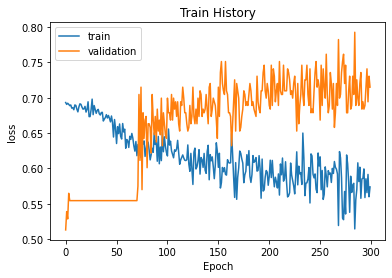

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history,'loss','acc')


In [ ]:
yh_pred = heart_model.predict(Xh_test)


rounded = [round(x[0]) for x in yh_pred]
yh_pred = rounded

from sklearn.metrics import accuracy_score
score_nn = round(accuracy_score(yh_pred,yh_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_nn)+" %")

The accuracy score of the optimized model on the Test set is: 88.52 %


In [ ]:
# evaluate the model
lossh, accuracyh, f1_scoreh, precisionh, recallh = heart_model.evaluate(Xh_test, yh_test, verbose=0)
print(lossh)
print(accuracyh)
print(f1_scoreh)
print(precisionh)
print(recallh)

0.4617661237716675
0.8852459192276001
0.8796295523643494
0.9230769276618958
0.8402255773544312


In [ ]:
from sklearn.metrics import roc_curve
yh_pred_keras = heart_model.predict(Xh_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yh_test, yh_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9664502164502166

Confusion matrix, without normalization
[[26  2]
 [ 5 28]]


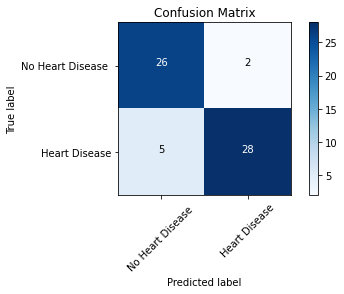

In [ ]:
cm = confusion_matrix(y_true=yh_test, y_pred=yh_pred)
cm_plot_labels = ['No Heart Disease ','Heart Disease']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
tf.keras.models.save_model(heart_model,'heart_pred.h5', overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True)
tf.keras.models.save_model(diab_model, 'diabetes_pred.h5', overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True)